<a href="https://colab.research.google.com/github/mart-77/BigData/blob/main/Proyecto_BigData_MartinRodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de Sentimiento en Twitter:
# Descarga



In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

!unzip twitter-entity-sentiment-analysis.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 32.0MB/s]
Archive:  twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [2]:
import os
import pandas as pd

# Leer el archivo
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Exploracion de Datos y Procesamiento de Datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000





Se le agrega los titulos a las columnas y se eliminan las columnas no deseadas

In [7]:
# Agrega los titulos de las columnas
mydf = df.columns = ['id', 'titulo', 'clasificacion', 'comentario']
df.head()

,id,titulo,clasificacion,comentario
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
# Elimina la columna id
mydf = df.drop('id', axis=1)
mydf.head()

,titulo,clasificacion,comentario
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Hay que limpiar los caracteres especiales

In [9]:
import re

# Funcion para eliminar los caracteres especiales
def clean(comentario):
  comentario = re.sub('[^A-Za-z]+', ' ', comentario)
  return comentario

mydf['comentarios_limpios'] = mydf['comentario'].astype(str)
mydf.head()

,titulo,clasificacion,comentario,comentarios_limpios
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [15]:
print(df.isnull().sum())

id                 0
titulo             0
clasificacion      0
comentario       686
dtype: int64


No creo conveniente eliminar los comentarios nulos ya que igual cuentan con su clasificacion

In [16]:
# Eliminiar duplicados
mydf = mydf.drop_duplicates(subset=['comentarios_limpios'])

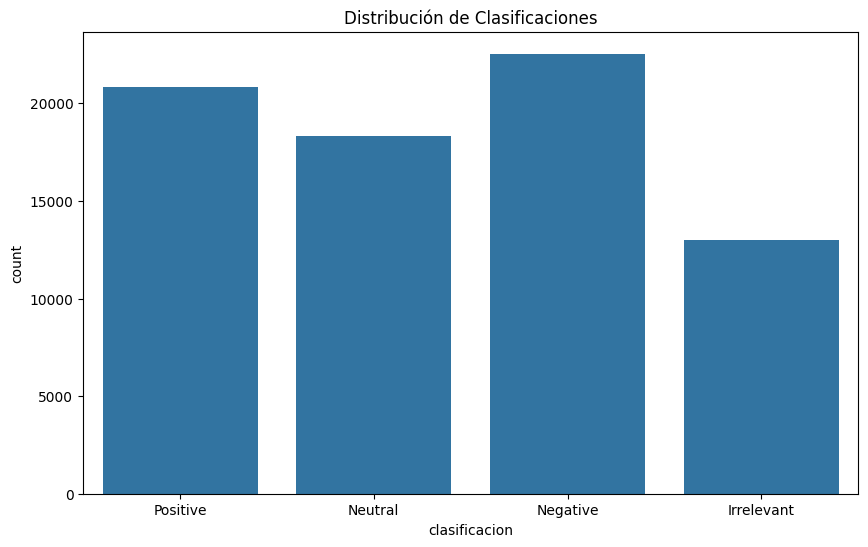

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de valores de la columna 'clasificacion'
plt.figure(figsize=(10, 6))
sns.countplot(x='clasificacion', data=df)
plt.title('Distribución de Clasificaciones')
plt.show()

Las 10 palabras más comunes son: [('the', 36793), ('to', 26723), ('I', 24619), ('and', 24149), ('a', 21330), ('of', 17905), ('is', 15931), ('/', 14576), ('for', 14512), ('in', 13839)]


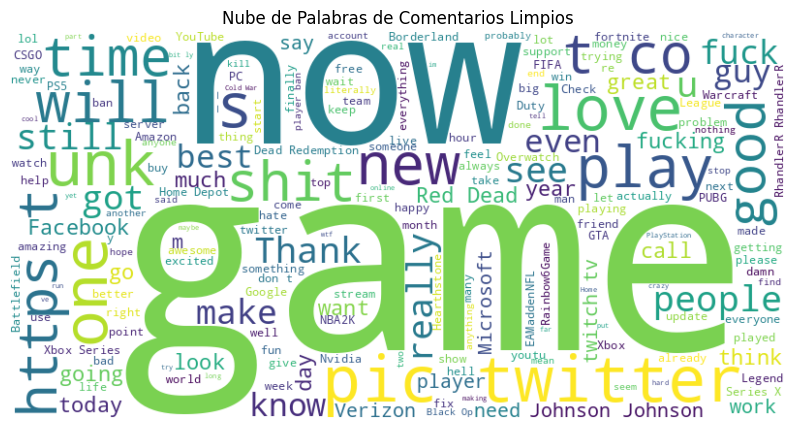

In [21]:
# Analisis de palabras mas frecuentes
from collections import Counter
from wordcloud import WordCloud

all_words = ' '.join(mydf['comentarios_limpios'])
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(10)
print("Las 10 palabras más comunes son:", common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios Limpios')
plt.show()

# Extraccion de caracteristicas

In [22]:
# Tokenization, POS tagging, stopwords removal

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(comentario):
    tags = pos_tag(word_tokenize(comentario))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydf['POS tagged'] = mydf['comentarios_limpios'].apply(token_stop_pos)
mydf.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,titulo,clasificacion,comentario,comentarios_limpios,POS tagged
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,"[(coming, v), (borders, n), (kill, v), (,, None)]"
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,"[(im, n), (getting, v), (borderlands, n), (kil..."
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[(im, n), (coming, v), (borderlands, n), (murd..."
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[(im, n), (getting, v), (borderlands, n), (2, ..."
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,"[(im, n), (getting, v), (borderlands, n), (mur..."


In [23]:
# Lematizacion
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Funcion
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydf['Lemma'] = mydf['POS tagged'].apply(lemmatize)
mydf.head()

,titulo,clasificacion,comentario,comentarios_limpios,POS tagged,Lemma
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,"[(coming, v), (borders, n), (kill, v), (,, None)]","come border kill ,"
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,"[(im, n), (getting, v), (borderlands, n), (kil...","im get borderland kill ,"
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[(im, n), (coming, v), (borderlands, n), (murd...","im come borderland murder ,"
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[(im, n), (getting, v), (borderlands, n), (2, ...","im get borderland 2 murder ,"
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,"[(im, n), (getting, v), (borderlands, n), (mur...","im get borderland murder ,"


In [24]:
import re

# Funcion para extraer los emojis
def extract_emoticons(text):
  emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]'
  emoticons = re.findall(emoticon_pattern, text)
  return emoticons

mydf['emoticons'] = mydf['comentarios_limpios'].apply(extract_emoticons)

In [25]:
# Función para extraer hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags

# Aplica la función a la columna correspondiente del DataFrame
mydf['hashtags'] = mydf['comentarios_limpios'].apply(extract_hashtags)

In [26]:
print(mydf[['comentarios_limpios', 'emoticons', 'hashtags']].head())

                                 comentarios_limpios emoticons hashtags
0  I am coming to the borders and I will kill you...        []       []
1  im getting on borderlands and i will kill you ...        []       []
2  im coming on borderlands and i will murder you...        []       []
3  im getting on borderlands 2 and i will murder ...        []       []
4  im getting into borderlands and i can murder y...        []       []


In [29]:
# Conteo de los emojis y hashtags con Counter
from collections import Counter
all_hashtags = sum(mydf['hashtags'], [])
all_emoticons = sum(mydf['emoticons'], [])

hashtags_counter = Counter(all_hashtags)
emojis_counter = Counter(all_emoticons)

print("Hashtags más comunes:", hashtags_counter.most_common(10))
print("Emojis más comunes:", emojis_counter.most_common(10))

Hashtags más comunes: []
Emojis más comunes: [('🙂', 4)]


Hay 4 regristros con este emoji 🙂 y no hay hashtags

# Analisis de sentimiento con TextBlob
Herramienta utilizada en clase




In [10]:
from textblob import TextBlob

# Definiciones para obtener la subjetividad y polaridad del comentario
def getSubjectivity(comentario):
    return TextBlob(comentario).sentiment.subjectivity

def getPolarity(comentario):
    return TextBlob(comentario).sentiment.polarity

In [11]:
fin_data = pd.DataFrame(mydf[['comentario', 'Lemma']])

In [12]:

fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data.head()

,comentario,Lemma,Subjectivity,Polarity
0,I am coming to the borders and I will kill you...,"come border kill ,",0.0,0.0
1,im getting on borderlands and i will kill you ...,"im get borderland kill ,",0.0,0.0
2,im coming on borderlands and i will murder you...,"im come borderland murder ,",0.0,0.0
3,im getting on borderlands 2 and i will murder ...,"im get borderland 2 murder ,",0.0,0.0
4,im getting into borderlands and i can murder y...,"im get borderland murder ,",0.0,0.0


In [13]:
# Conteo de cantidad de clasificacion
tb_counts = df.clasificacion.value_counts()
tb_counts

clasificacion
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b042e469780>,
 [Text(0.6413979879276777, 0.8936490480509263, 'Negative'),
  Text(-1.0260534138311959, 0.3965027010820343, 'Positive'),
  Text(-0.3173711731164097, -1.0532215049431501, 'Neutral'),
  Text(1.1534071773703791, -0.7015353755802305, 'Irrelevant')],
 [Text(0.34985344796055146, 0.4874449353005052, '30.2%'),
  Text(-0.5596654984533795, 0.2162742005902005, '27.9%'),
  Text(-0.1731115489725871, -0.5744844572417183, '24.5%'),
  Text(0.7262193338998683, -0.44170745869866357, '17.4%')])

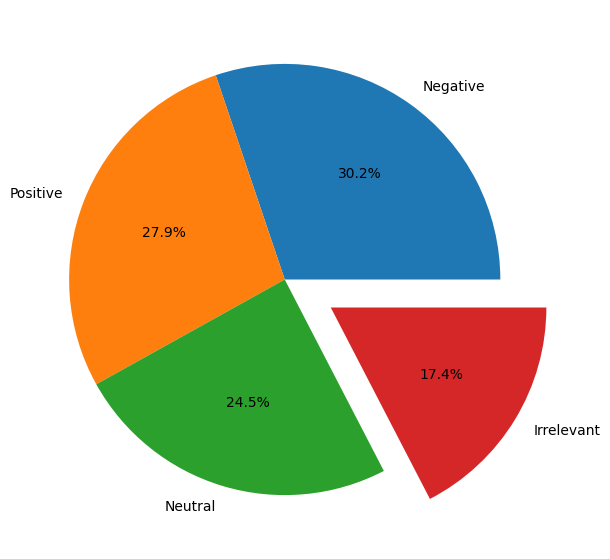

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Grafico de clasificacion
tb_count= df.clasificacion.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0, 0.25), autopct='%1.1f%%', shadow=False)

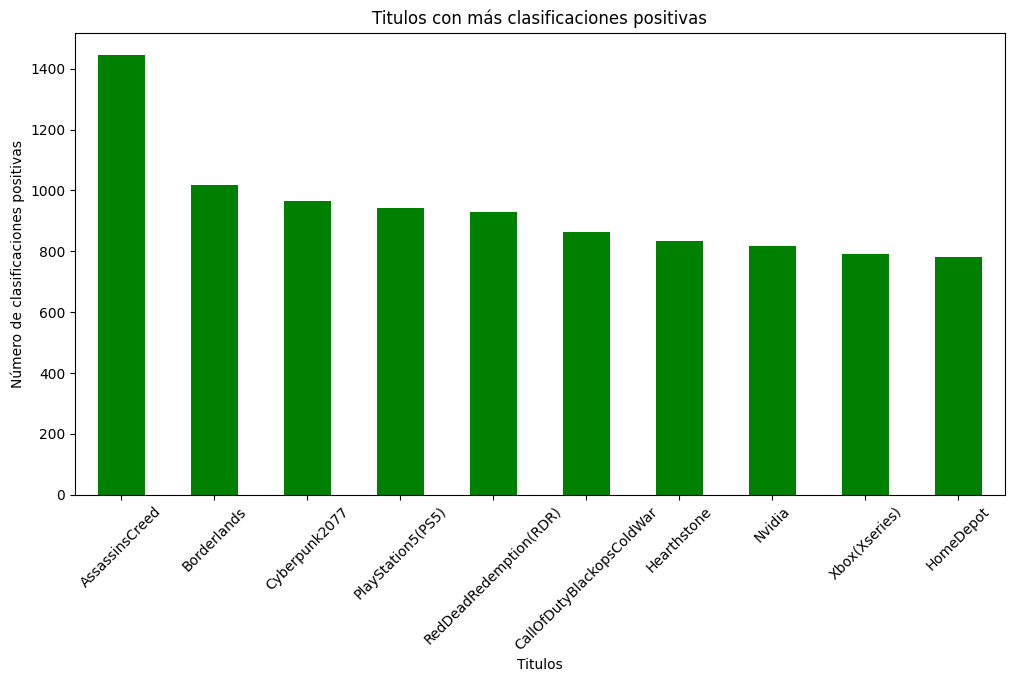

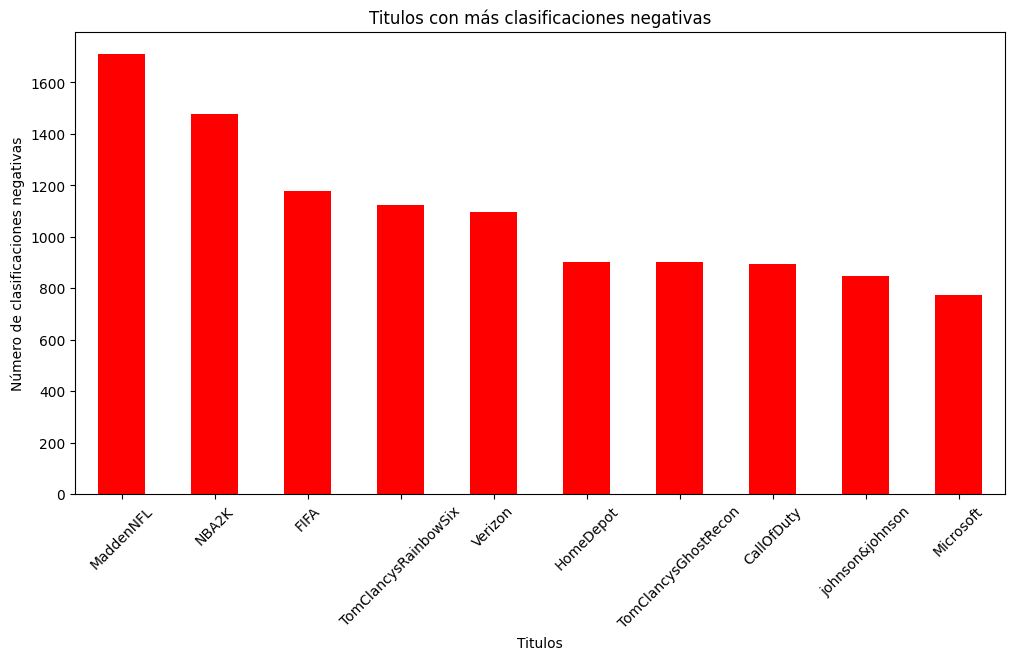

In [15]:
import matplotlib.pyplot as pls

# Filtra las clasificacines negativas y posotivas
positivas = df[df['clasificacion'] == 'Positive']
negativas = df[df['clasificacion'] == 'Negative']

# Conteo de cantidades
conteo_positivas = positivas['titulo'].value_counts()
conteo_negativas = negativas['titulo'].value_counts()

# Grafico de los titulos con más clasificaciones positivas
plt.figure(figsize=(12, 6))
conteo_positivas.head(10).plot(kind='bar', color='green')
plt.title('Titulos con más clasificaciones positivas')
plt.xlabel('Titulos')
plt.ylabel('Número de clasificaciones positivas')
plt.xticks(rotation=45)
plt.show()

# Grafica de los tirulos con más clasificaciones negativas
plt.figure(figsize=(12, 6))
conteo_negativas.head(10).plot(kind='bar', color='red')
plt.title('Titulos con más clasificaciones negativas')
plt.xlabel('Titulos')
plt.ylabel('Número de clasificaciones negativas')
plt.xticks(rotation=45)
plt.show()

# Entrenamiento de Modelo Naive Bayes y SVM

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [23]:
# Division de Datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = mydf['comentarios_limpios']
y = mydf['clasificacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Entrenamiento modelo Naive Bayes
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Entrenamiento
nb_pipeline.fit(X_train, y_train)

# Prediciones
nb_pred = nb_pipeline.predict(X_test)

# Resultados
print("Naive Bayes:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.40      0.56      2661
    Negative       0.64      0.91      0.75      4471
     Neutral       0.83      0.62      0.71      3551
    Positive       0.72      0.82      0.77      4254

    accuracy                           0.72     14937
   macro avg       0.79      0.69      0.70     14937
weighted avg       0.77      0.72      0.71     14937

Accuracy: 0.7241079199303743


In [25]:
# Entrenamiento modelo SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Entrenamiento
svm_pipeline.fit(X_train, y_train)

# Prediciones
svm_pred = svm_pipeline.predict(X_test)

# Resultados
print("\nSVM:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))


SVM:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.77      0.81      2661
    Negative       0.84      0.89      0.87      4471
     Neutral       0.85      0.80      0.82      3551
    Positive       0.81      0.85      0.83      4254

    accuracy                           0.84     14937
   macro avg       0.84      0.83      0.83     14937
weighted avg       0.84      0.84      0.84     14937

Accuracy: 0.8361116690098414


# Evaluacion de rendimiento con metricas

Accuracy (Exactitud): Es la proporción de verdaderos positivos y verdaderos negativos sobre el total de casos. Es una buena métrica general, pero puede ser engañosa si tienes clases desbalanceadas.

Precision (Precisión): Es la proporción de verdaderos positivos sobre el total de positivos predichos. Indica cuántos de los ejemplos predichos como positivos son realmente positivos.

Recall (Sensibilidad o Exhaustividad): Es la proporción de verdaderos positivos sobre el total de positivos reales. Indica cuántos de los ejemplos realmente positivos son correctamente identificados por el modelo.

F1-Score: Es la media armónica de la precisión y el recall. Proporciona una única métrica que equilibra ambos aspectos, siendo especialmente útil cuando tienes clases desbalanceadas.


